In [ ]:
# Necessary imports

import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, Layout
from bokeh.io import output_notebook
from prettytable import PrettyTable
import locale
import warnings

warnings.filterwarnings('ignore')

# For number formatting 
locale.setlocale(locale.LC_ALL, '') 

# Call once to configure Bokeh to display plots inline in the notebook
output_notebook()

# Style of plots
matplotlib.style.use('seaborn')

In [ ]:
print("hello world")

hello world


In [ ]:
df = pd.read_csv('owid-covid-data.csv')


In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120124,ZWE,Africa,Zimbabwe,2021-09-25,129505.0,371.0,252.286,4603.0,3.0,5.714,8580.939,24.582,16.716,304.993,0.199,0.379,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3945.0,1245344.0,82.516,0.261,4704.0,0.312,0.054,18.6,tests performed,5218672.0,3030042.0,2188630.0,NaN,21309.0,32310.0,34.58,20.08,14.50,NaN,2141.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120125,ZWE,Africa,Zimbabwe,2021-09-26,129625.0,120.0,241.000,4604.0,1.0,5.286,8588.890,7.951,15.969,305.059,0.066,0.350,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2248.0,1247592.0,82.665,0.149,4736.0,0.314,0.051,19.7,tests performed,5234875.0,3036623.0,2198252.0,NaN,16203.0,31405.0,34.69,20.12,14.57,NaN,2081.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,

In [ ]:
all_countries = set(df['location'])

In [ ]:
num_countries = len(all_countries)

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
us_cases = df.loc[df['location'] == 'United States']

In [ ]:
us_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
113839,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
113840,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
113841,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
113842,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
113843,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9154.4,-3.68,-3.08,-27.497704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114451,USA,North America,United States,2021-09-25,42900402.0,47531.0,120370.143,687746.0,662.0,1990.857,128862.900,142.772,361.564,2065.830,1.988,5.980,0.90,21713.0,65.221,74823.0,224.751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389372689.0,213177462.0,183353326.0,2527656.0,805580.0,637343.0,115.77,63.38,54.52,0.75,1895.0,61.57,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
114452,USA,North America,United States,2021-09-26,42931354.0,30952.0,119597.857,688032.0,286.0,1987.286,128955.873,92.973,359.244,2066.689,0.859,5.969,0.91,21528.0,64.665,74173.0,222.799,NaN,NaN,62330.0,187.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390114328.0,21345678

In [ ]:
us_cases.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.170000e+02,616.000000,611.000000,579.000000,579.000000,611.000000,617.000000,616.000000,611.000000,579.00000,579.000000,611.000000,573.000000,442.000000,442.000000,442.000000,442.000000,0.0,0.0,62.000000,62.000000,5.720000e+02,5.720000e+02,572.000000,572.000000,5.650000e+02,565.000000,565.000000,565.000000,2.650000e+02,2.640000e+02,2.500000e+02,3.200000e+01,2.510000e+02,2.830000e+02,265.000000,264.000000,250.000000,32.000000,283.000000,616.000000,617.0,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,0.0,6.170000e+02,6.170000e+02,6.170000e+02,82.000000,82.000000,82.000000,82.000000
mean,1.708871e+07,70372.094156,70388.501529,346025.053541,1200.542314,1128.257679,51330.550493,211.381505,211.430840,1039.37933,3.606140,3.389026,1.134380,14038.938914,42.169762,54576.619910,163.935554,NaN,NaN,51076.129032,153.420887,9.966451e+05,2.410255e+08,723.984795,2.993682,1.001919e+06,3.009558,0.072216,18.258761,2.258911e+08,1.306901e+08,1.069960e+08,1.768814e+06,1.492048e+06,1.377481e+06,67.164491,38.858258,31.813440,0.526250,4095.703180,59.412321,332915074.0,3.560800e+01,3.830000e+01,1.541300e+01,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,346435.178049,11.118780,14.767195,1040.611270
std,1.453663e+07,67820.163298,62832.783521,222614.631597,955.096848,854.538006,43664.680000,203.716114,188.735187,668.68295,2.868895,2.566836,0.488592,7545.601992,22.665254,32910.743084,98.856265,NaN,NaN,29623.856765,88.983193,5.553498e+05,1.870801e+08,561.945283,1.668123,4.866330e+05,1.461748,0.038301,10.531349,1.302529e+08,6.881282e+07,6.229518e+07,6.903909e+05,9.355474e+05,8.428944e+05,38.728064,20.460260,18.522565,0.205501,2506.187074,17.594907,0.0,1.493350e-13,4.337827e-13,1.244459e-13,2.666697e-14,5.242940e-10,8.444541e-15,2.133358e-12,3.200037e-14,2.133358e-13,2.488917e-13,NaN,1.466683e-14,4.551163e-13,3.333371e-15,244495.584655,6.061012,12.477590,734.408273
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.00300,0.000000,0.000000,0.710000,3525.000000,10.588000,12230.000000,36.736000,NaN,NaN,13384.000000,40.202000,3.480000e+02,3.480000e+02,0.001000,0.001000,1.164000e+03,0.003000,0.018000,4.900000,5.562080e+05,5.562080e+05,1.342086e+06,6.428610e+05,5.790900e+04,5.790900e+04,0.170000,0.170000,0.400000,0.190000,172.000000,0.000000,332915074.0,3.560800e+01,3.830000e+01,1.541300e+01,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,-13818.000000,-3.680000,-3.080000,-41.506081
25%,2.385047e+06,24375.750

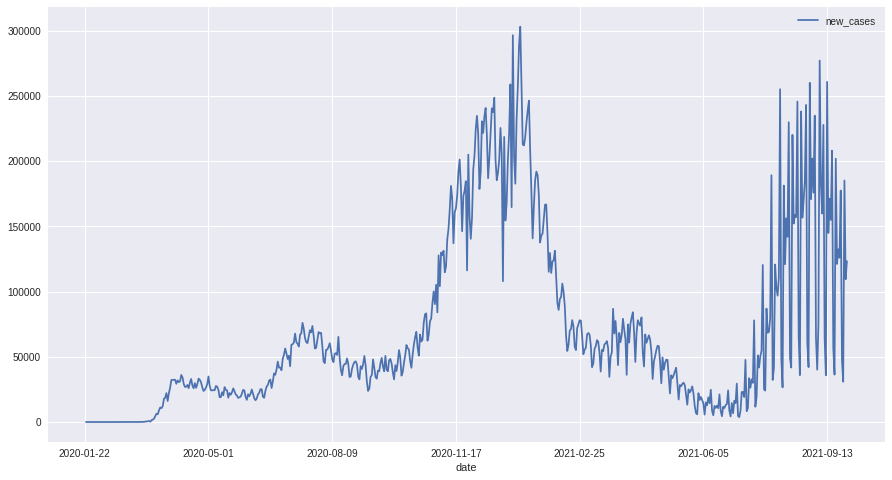

In [ ]:
us_cases.plot(x='date',y='new_cases',figsize=(15,8))

In [ ]:
us_cases['7_day_avg'] = us_cases['new_cases'].rolling(window=7).mean()

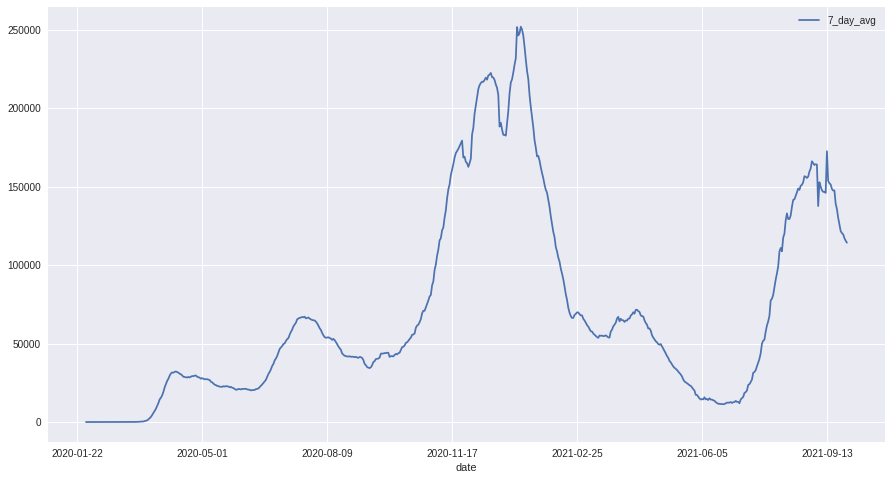

In [ ]:
us_cases.plot(x='date',y='7_day_avg',figsize=(15,8))

In [ ]:
def multiplot(metric):
  us_cases.plot(x='date',y=metric,figsize=(15,8),title = 'United States COVID-19 Data')
  
interact(multiplot, metric = list(df.columns)[4:])  

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.multiplot>

In [ ]:
def multiplot(metric):
  fig = px.line(us_cases, x = 'date', y = metric, width = 1300, height = 600)
  fig.update_layout(title_text='United States COVID-19 Data')
  fig.update_xaxes(rangeslider_visible=True)
  fig.show()

interact(multiplot, metric = list(df.columns)[4:]) 

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.multiplot>

In [ ]:
dropdown = widgets.SelectMultiple(
    options = list(df.columns)[4:],
    value = ['new_cases_smoothed'],
    rows=15,
    description='Metrics',
    disabled = False,
    layout=Layout(width = '500px', height='200px')
)

def multivariablePlot(metrics):
  fig= go.Figure()
  for metric in metrics['new']:
    fig.add_trace(go.Scatter(x=us_cases['date'], y = us_cases[metric], name = metric))
  fig.update_layout(title_text='United States COVID-19 Data')
  fig.update_xaxes(rangeslider_visible=True)
  fig.show()

dropdown.observe(multivariablePlot, names='value')
display(dropdown)

SelectMultiple(description='Metrics', index=(2,), layout=Layout(height='200px', width='500px'), options=('tota…

In [ ]:
dropdown.value

('new_cases_smoothed',)